In [2]:
import pandas as pd
import numpy as np

# 1. Series

In [3]:
list = [1,2,3]

In [4]:
list[0]

1

In [5]:
list[1]

2

In [6]:
indices = ['a','b','c']
data = [10,20,30]
s1 = pd.Series(data,indices)


In [7]:
s1

a    10
b    20
c    30
dtype: int64

In [8]:
s1['a']

10

In [9]:
s1['b']

20

In [10]:
s2 = pd.Series({'a':10,'b':20,'c':30}) #doing same thing creating dictionary
s2

a    10
b    20
c    30
dtype: int64

In [11]:
s2['c']

30

In [12]:
s2['a'] = 10**3 #redefining value

In [13]:
s2

a    1000
b      20
c      30
dtype: int64

In [14]:
s1 + s2

a    1010
b      40
c      60
dtype: int64

In [15]:
s3 = pd.Series({'a':50,'d':70})
s3

a    50
d    70
dtype: int64

In [16]:
s1 + s3

a    60.0
b     NaN
c     NaN
d     NaN
dtype: float64

In [17]:
s1-s2

a   -990
b      0
c      0
dtype: int64

In [18]:
s1*s2

a    10000
b      400
c      900
dtype: int64

In [19]:
s1.sum() #total sum of that series

60

In [20]:
s1.product()

6000

# 2. Dataframes

In [21]:
df = pd.DataFrame(np.random.rand(3,5),['A','B','C'],['price','volume','return rate','open price','close price'])

In [22]:
df

,price,volume,return rate,open price,close price
A,0.943968,0.703167,0.029342,0.921583,0.756283
B,0.785323,0.318359,0.680908,0.525531,0.931799
C,0.044707,0.400362,0.444775,0.245619,0.633443


In [23]:
df['price']

A    0.943968
B    0.785323
C    0.044707
Name: price, dtype: float64

In [24]:
type(df['price'])

pandas.core.series.Series

In [25]:
df.loc['A']

price          0.943968
volume         0.703167
return rate    0.029342
open price     0.921583
close price    0.756283
Name: A, dtype: float64

In [26]:
type(df.loc['A'])

pandas.core.series.Series

In [27]:
df["volume"]["C"]

0.40036168421206375

In [28]:
df.loc['C'].loc['volume']

0.40036168421206375

In [29]:
out = ['LEB','LEB','LEB','FRA','FRA','FRA','USA','USA','USA']
inside = ['MORNING','MIDDAY','EVENING','MORNING','MIDDAY','EVENING','MORNING','MIDDAY','EVENING']
indexRows = zip(out,inside)
indexRows = pd.MultiIndex.from_tuples(indexRows)
df2 = pd.DataFrame(np.random.rand(9,3),indexRows,['price','close','open'])
df2

price     close      open
LEB MORNING  0.842598  0.923923  0.798661
    MIDDAY   0.870565  0.987413  0.230575
    EVENING  0.952699  0.905741  0.369520
FRA MORNING  0.373645  0.070986  0.710554
    MIDDAY   0.411906  0.733175  0.675515
    EVENING  0.990671  0.091731  0.950516
USA MORNING  0.003060  0.573307  0.693648
    MIDDAY   0.013933  0.932874  0.282893
    EVENING  0.220861  0.013004  0.131882

In [30]:
df2.loc['LEB'].loc['EVENING'].loc['close']

0.9057413314870427

# 3.Operations on Dataframe

# 3.1 Booleans or logical operations

In [31]:
df

,price,volume,return rate,open price,close price
A,0.943968,0.703167,0.029342,0.921583,0.756283
B,0.785323,0.318359,0.680908,0.525531,0.931799
C,0.044707,0.400362,0.444775,0.245619,0.633443


In [32]:
df > 0.5

,price,volume,return rate,open price,close price
A,True,True,False,True,True
B,True,False,True,True,True
C,False,False,False,False,True


In [33]:
df[df>0.5] #this means give me data which is greater than 0.5..

,price,volume,return rate,open price,close price
A,0.943968,0.703167,NaN,0.921583,0.756283
B,0.785323,NaN,0.680908,0.525531,0.931799
C,NaN,NaN,NaN,NaN,0.633443


In [34]:
(df <0.3) & (df > 0.9) #its not possible that every value is less than 0.3 and grater than 0.9 at same time...so all false

,price,volume,return rate,open price,close price
A,False,False,False,False,False
B,False,False,False,False,False
C,False,False,False,False,False


In [35]:
(df <0.3) | (df > 0.9) #this | represents "or"

,price,volume,return rate,open price,close price
A,True,False,True,True,False
B,False,False,False,False,True
C,True,False,False,True,False


In [36]:
(df >0.3) & (df < 0.9)

,price,volume,return rate,open price,close price
A,False,True,False,False,True
B,True,True,True,True,False
C,False,True,True,False,True


In [37]:
df[(df >0.3) & (df < 0.9)] # show me values..greater than 0.3 less than 0.9...

,price,volume,return rate,open price,close price
A,NaN,0.703167,NaN,NaN,0.756283
B,0.785323,0.318359,0.680908,0.525531,NaN
C,NaN,0.400362,0.444775,NaN,0.633443


# 3.2 Grouping Elements(Aggregate Functions)

In [38]:
dictionary = {'country':['LEB','FR','INDIA','NIG','LEB','FR','INDIA','NIG'],'STOCK PRICE':[312,63,425,25,28,122,477,85]}
df =pd.DataFrame(dictionary,['a','b','c','d','e','f','g','h'])
df

,country,STOCK PRICE
a,LEB,312
b,FR,63
c,INDIA,425
d,NIG,25
e,LEB,28
f,FR,122
g,INDIA,477
h,NIG,85


In [39]:
df.describe()

,STOCK PRICE
count,8.000000
mean,192.125000
std,184.270327
min,25.000000
25%,54.250000
50%,103.500000
75%,340.250000
max,477.000000


In [40]:
df.describe().loc['std'].loc['STOCK PRICE'] #std of stockprice

184.27032743073033

In [41]:
g =df.groupby('country')
g

In [42]:
g.mean()

,STOCK PRICE
country,
FR,92.5
INDIA,451.0
LEB,170.0
NIG,55.0


In [43]:
for country, country_df in g:
    print(country)
    print(country_df)


FR
  country  STOCK PRICE
b      FR           63
f      FR          122
INDIA
  country  STOCK PRICE
c   INDIA          425
g   INDIA          477
LEB
  country  STOCK PRICE
a     LEB          312
e     LEB           28
NIG
  country  STOCK PRICE
d     NIG           25
h     NIG           85


In [44]:
g.get_group('INDIA')

,country,STOCK PRICE
c,INDIA,425
g,INDIA,477


## 3.3 Concatenation

In [45]:
DF1  = pd.DataFrame({'A':[1,2,3,4],
                     'B':[10,20,30,40],
                     'C':[100,200,300,400]},['A','B','C','D'])
DF2  = pd.DataFrame({'A':[5,6,7,8],
                     'B':[50,60,70,80],
                     'C':[500,600,700,800]},['E','F','G','H']) 
DF3  = pd.DataFrame({'A':[9,10,11,12],
                     'B':[90,100,110,120],
                     'C':[900,1000,1100,1200]},['I','J','K','L']) 

In [110]:
DF1

,A,B,C
A,1,10,100
B,2,20,200
C,3,30,300
D,4,40,400


In [47]:
DF2

,A,B,C
E,5,50,500
F,6,60,600
G,7,70,700
H,8,80,800


In [48]:
DF3

,A,B,C
I,9,90,900
J,10,100,1000
K,11,110,1100
L,12,120,1200


In [49]:
DF = pd.concat([DF1,DF2,DF3]) 

In [50]:
DF

,A,B,C
A,1,10,100
B,2,20,200
C,3,30,300
D,4,40,400
E,5,50,500
F,6,60,600
G,7,70,700
H,8,80,800
I,9,90,900
J,10,100,1000


In [51]:
#DF = pd.concat([DF1,DF2,DF3],axis=1)...it will show data horizontally..

# 3.4 Merging


In [112]:
D1  = pd.DataFrame({'A':[1,2,3,4],
                     'B':[10,20,30,40],
                     'C':[100,200,300,400]})
D2  = pd.DataFrame({'C':[100,200,300,400],
                     'D':[50,60,70,80],
                     'E':[500,600,700,800]}) # 'C' is common...
D1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [113]:
D2

,C,D,E
0,100,50,500
1,200,60,600
2,300,70,700
3,400,80,800


In [114]:
pd.merge(D1,D2)

,A,B,C,D,E
0,1,10,100,50,500
1,2,20,200,60,600
2,3,30,300,70,700
3,4,40,400,80,800


In [115]:
pd.concat([D1,D2])

,A,B,C,D,E
0,1.0,10.0,100,NaN,NaN
1,2.0,20.0,200,NaN,NaN
2,3.0,30.0,300,NaN,NaN
3,4.0,40.0,400,NaN,NaN
0,NaN,NaN,100,50.0,500.0
1,NaN,NaN,200,60.0,600.0
2,NaN,NaN,300,70.0,700.0
3,NaN,NaN,400,80.0,800.0


# 3.5)Unique Values

In [55]:
dy = pd.DataFrame({'1':[10,20,30,40],
                   '2':[31,23242,2564,31],
                   '3':['asd','sddd','akju','uiyt']},['a.','b.','c.','d.'])
dy

,1,2,3
a.,10,31,asd
b.,20,23242,sddd
c.,30,2564,akju
d.,40,31,uiyt


In [56]:
dy['2'] # 2 is coulumn no. here...

a.       31
b.    23242
c.     2564
d.       31
Name: 2, dtype: int64

In [57]:
dy['2'].unique() #31 is two times above..below it will show once..

array([   31, 23242,  2564], dtype=int64)

In [58]:
dy['2'].unique()[1] #1 is index here...which is a.

23242

In [59]:
dy['2'].nunique() # no. of unique counts....

3

In [60]:
dy['2'].value_counts() #it shows in 2nd column..31 is being shown twice and so on...

31       2
23242    1
2564     1
Name: 2, dtype: int64

# 3.6 Functions

In [61]:
def multiplier(x):
    return x*3
    

In [62]:
multiplier(5)

15

In [116]:
D1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [117]:
multiplier(D1)

,A,B,C
0,3,30,300
1,6,60,600
2,9,90,900
3,12,120,1200


In [118]:
D1.apply(multiplier) #other way of doing above...

,A,B,C
0,3,30,300
1,6,60,600
2,9,90,900
3,12,120,1200


In [119]:
multiplier(D1['C']) #column C

0     300
1     600
2     900
3    1200
Name: C, dtype: int64

In [120]:
D1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [121]:
D1.apply(lambda x:x*2 + 1)

,A,B,C
0,3,21,201
1,5,41,401
2,7,61,601
3,9,81,801


In [122]:
D1['A'].apply(lambda x:x*2 + 1)

0    3
1    5
2    7
3    9
Name: A, dtype: int64

# 3.7 Removing Rows/coulumns

In [140]:
ud= pd.DataFrame({'A':[1,2,3,4],
                     'B':[10,20,30,40],
                     'C':[100,200,300,400]})
ud

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [141]:
ud.drop(2) #removing rows

,A,B,C
0,1,10,100
1,2,20,200
3,4,40,400


In [142]:
ud #although above its showing it removed row-2..but we can see its not removed...

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [143]:
ud.drop(2 ,inplace= True) 

In [144]:
ud #now row-2 is removed...

,A,B,C
0,1,10,100
1,2,20,200
3,4,40,400


In [145]:
ud.drop('B',axis=1,inplace=True) #removing coulumn B..

In [146]:
ud

,A,C
0,1,100
1,2,200
3,4,400


# 4. Data/File IO(input/output)

# 4.1) CSV
# 4.2) Excel
# 4.3) HTML(over the web)

# 4.1

In [178]:
df =pd.read_csv('./weather_data.csv') #opening a csv file in current directory
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [179]:
df2 = df

In [172]:
df2.to_csv('./justchecking.csv')#saving to a new file after working on it...

# 4.2

In [154]:
df1 =pd.read_excel('./weather_data - Copy.xlsx')
df1

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-01-02,35,7,Sunny
2,2017-01-03,28,2,Snow
3,2017-01-04,24,7,Snow
4,2017-01-05,32,4,Rain
5,2017-01-06,32,2,Sunny


In [168]:
df1['day'][2]

Timestamp('2017-01-03 00:00:00')

In [169]:
df1.drop('day', axis=1, inplace=True)

In [170]:
df1

,temperature,windspeed,event
0,32,6,Rain
1,35,7,Sunny
2,28,2,Snow
3,24,7,Snow
4,32,4,Rain
5,32,2,Sunny


In [173]:
df2=df1

In [174]:
df2.to_excel('./justchecking2.xlsx')

# 4.3

In [175]:
out =pd.read_html('https://www.moneycontrol.com/')

In [176]:
out

[Empty DataFrame
 Columns: [Index, Price, Change, % Chg]
 Index: [],
                    0         1       2     3
 0           Nifty 50  18114.90  -63.20 -0.35
 1         BSE Sensex  60821.62 -101.88 -0.17
 2         Nifty Bank  40323.65  293.45  0.73
 3           Nifty IT  35394.65 -518.95 -1.44
 4       BSE SmallCap  28336.31 -343.82 -1.20
 5         BSE MidCap  25566.64 -250.62 -0.97
 6         Nifty Auto  11433.95 -123.45 -1.07
 7      BSE Cap Goods  26835.21 -233.70 -0.86
 8   BSE Cons Durable  43468.40   38.15  0.09
 9           BSE FMCG  14304.42 -182.01 -1.26
 10    BSE Healthcare  25072.50 -403.20 -1.58
 11        BSE Metals  20333.74 -613.86 -2.93
 12     BSE Oil & Gas  18716.01  -78.92 -0.42
 13          BSE Teck  15392.19 -207.54 -1.33
 14         Nifty PSE   4187.65  -34.35 -0.81,
          Indices     Price  Change  % Chg
 0  Nasdaq Oct 22  15090.20 -125.50  -0.82
 1    FTSE Oct 22   7204.55   14.25   0.20,
           Company    Price  Change  Value  (Rs Cr.)
 0     Tata

# 5.Visualisation

In [180]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


<AxesSubplot:>

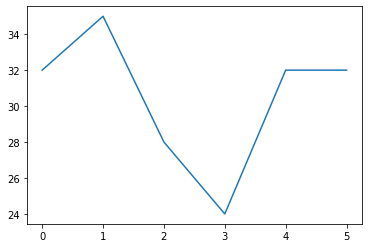

In [186]:
df['temperature'].plot()

<AxesSubplot:>

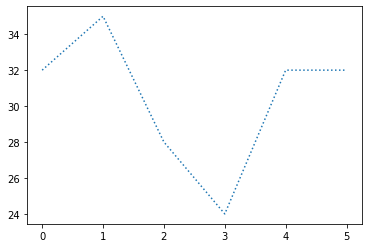

In [187]:
df['temperature'].plot(linestyle =':')

<AxesSubplot:>

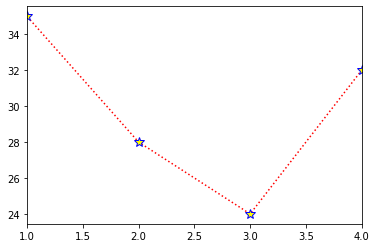

In [213]:
df['temperature'].plot(linestyle =':' ,color= "red",marker='*',markersize = 10,markeredgecolor='blue',markerfacecolor='yellow',xlim=[1,4])

# Histogram

<AxesSubplot:>

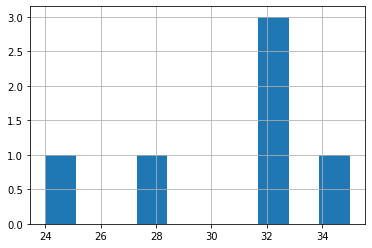

In [238]:
import matplotlib.pyplot as plt
%matplotlib inline
df['temperature'].hist()

<AxesSubplot:>

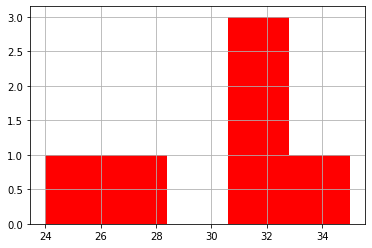

In [249]:
df['temperature'].hist( bins = 5, color ='red')

<AxesSubplot:>

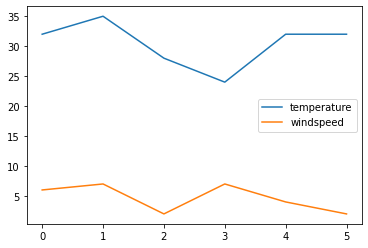

In [250]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

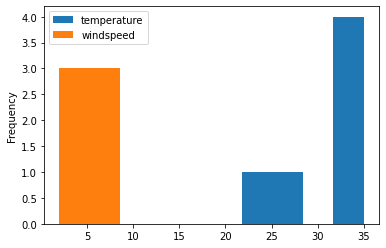

In [252]:
df.plot.hist()

<AxesSubplot:>

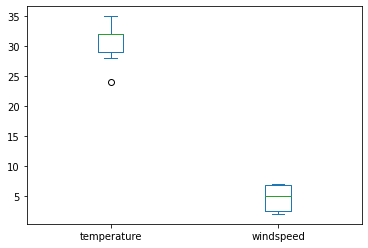

In [254]:
df.plot.box()

<AxesSubplot:>

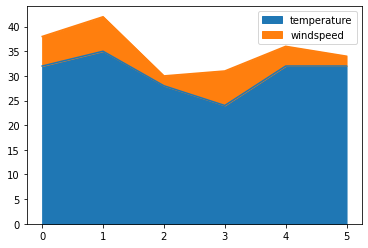

In [255]:
df.plot.area()